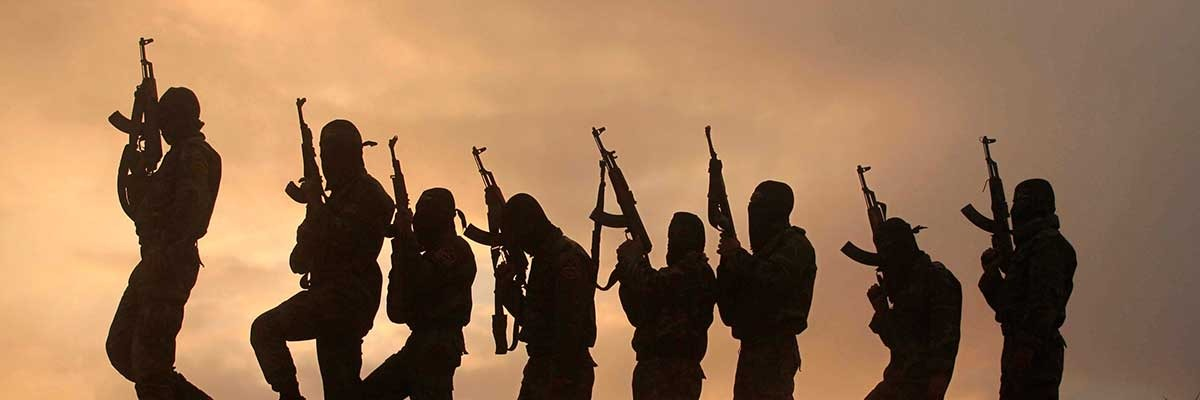

# <center> **Con los Terroristas** </center>

In [ ]:
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargar Dataset
import gdown
url = "https://drive.google.com/uc?id=1saYKtmlLaOZgzmTBNhsuF157f3evT8bV"
output = "globalterrorismdb_0718dist.csv"
data = gdown.download(url, output, quiet=False)

df_orig = pd.read_csv(data, encoding = "ISO-8859-1")

Downloading...
From: https://drive.google.com/uc?id=1saYKtmlLaOZgzmTBNhsuF157f3evT8bV
To: /content/globalterrorismdb_0718dist.csv
100%|██████████| 163M/163M [00:05<00:00, 32.0MB/s]
<ipython-input-2-f0501f69a99f>:7: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv(data, encoding = "ISO-8859-1")


In [ ]:
df = df_orig.copy()
print(df.shape)

(181691, 135)


# Filtrado del Dataset

<ipython-input-4-ac44c467893a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['provstate_numerical'] = label_encoder.fit_transform(df['provstate'])
<ipython-input-4-ac44c467893a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['gname_numerical'] = label_encoder.fit_transform(df['gname'])
<ipython-input-4-ac44c467893a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Text(0.5, 1.0, '¿Es o no ataque terrorista?')

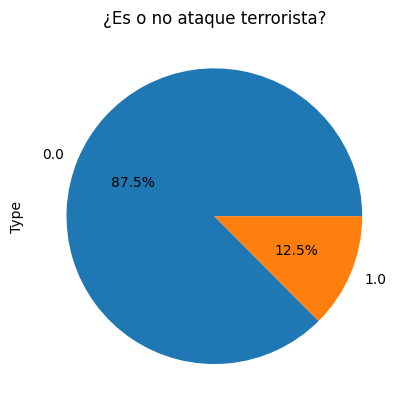

In [ ]:
#procesamiento de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# los txt para saber los valores
df_filtrado_txt = df[['country', 'country_txt', 'region', 'region_txt', 'attacktype1','targtype1','targtype1_txt', 'attacktype1_txt', 'targsubtype1','targsubtype1_txt', 'weaptype1',
                      'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'doubtterr']]

# datos numericos flitrados
df_filtrado = df[['extended','country', 'vicinity', 'crit1', 'crit2', 'crit3', 'success','suicide', 'attacktype1', 'targtype1', 'gname',
                  'targsubtype1', 'weaptype1', 'weapsubtype1', 'nkill','nwound', 'property','ishostkid', 'propvalue']]

# Crear una instancia del codificador
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'gname' y 'provstate'
df_filtrado['provstate_numerical'] = label_encoder.fit_transform(df['provstate'])
df_filtrado['gname_numerical'] = label_encoder.fit_transform(df['gname'])

# agregar ground trud
df_filtrado['doubtterr'] = df['doubtterr']

# filtar datos
df_filtrado = df_filtrado[df_filtrado['doubtterr'] != -9]
df_filtrado = df_filtrado.dropna()

# cantidad_nulos = df_filtrado.isnull().sum(axis=0)
# print(cantidad_nulos)

df_filtrado.groupby('doubtterr').size().plot(kind='pie',
                                       y = "doubtterr",
                                       label = "Type",
                                       autopct='%1.1f%%')

df_filtrado_1 = df_filtrado.copy()
plt.title("¿Es o no ataque terrorista?")

(7960, 22)


Text(0.5, 1.0, 'Dataset Balanceado')

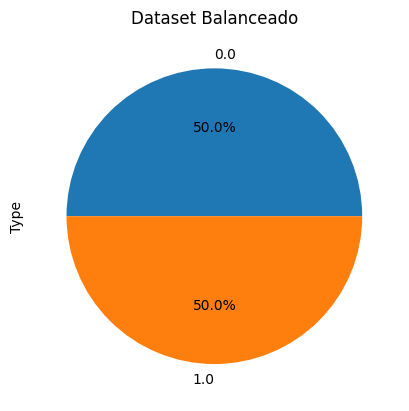

In [ ]:
# Fue necesario hacer un downsampling para balancear la carga.
# 1 -> No es terrorismo.
# 0 -> Es terrorismo.
df_0 = df_filtrado_1[df_filtrado_1['doubtterr']==0]
df_1 = df_filtrado_1[df_filtrado_1['doubtterr']==1]

df_downsaple = resample(df_0, replace=True, n_samples=len(df_1), random_state=10)
df_filtrado_1 = pd.concat([df_downsaple, df_1])

print(df_filtrado_1.shape)
df_filtrado_1.groupby('doubtterr').size().plot(kind='pie',
                                       y = "doubtterr",
                                       label = "Type",
                                       autopct='%1.1f%%')

#df_filtrado_1 = df_filtrado_1.copy()
df_filtrado_1 = df_filtrado_1.drop("gname", axis = 1)
plt.title("Dataset Balanceado")

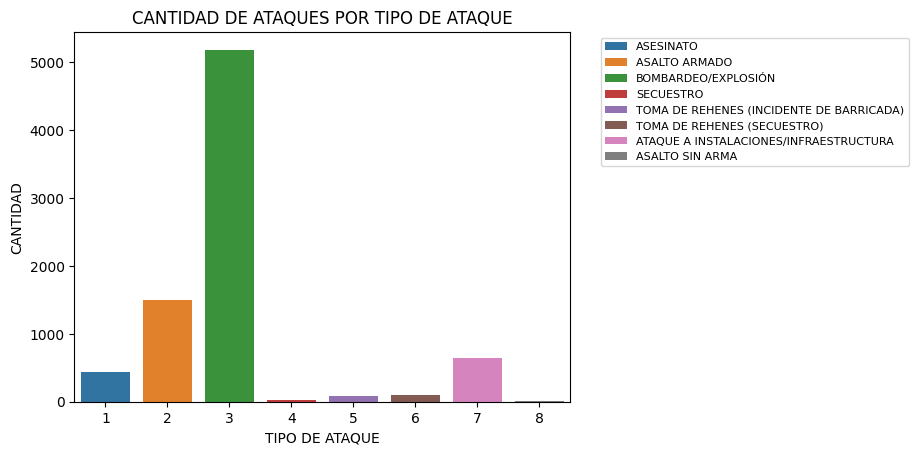

In [ ]:
# Numero de ataques por tipo de ataque primario
filtro_ataque = df_filtrado_1[['attacktype1']]
sns.countplot(data = filtro_ataque, x = 'attacktype1', hue = 'attacktype1', dodge = False)
plt.title("CANTIDAD DE ATAQUES POR TIPO DE ATAQUE")
plt.xlabel("TIPO DE ATAQUE")
plt.ylabel("CANTIDAD")
plt.legend(["ASESINATO","ASALTO ARMADO","BOMBARDEO/EXPLOSIÓN","SECUESTRO","TOMA DE REHENES (INCIDENTE DE BARRICADA)",
            "TOMA DE REHENES (SECUESTRO)","ATAQUE A INSTALACIONES/INFRAESTRUCTURA","ASALTO SIN ARMA","DESCONOCIDO"], fontsize=8,
           bbox_to_anchor=(1.05, 1.0), loc='upper left')

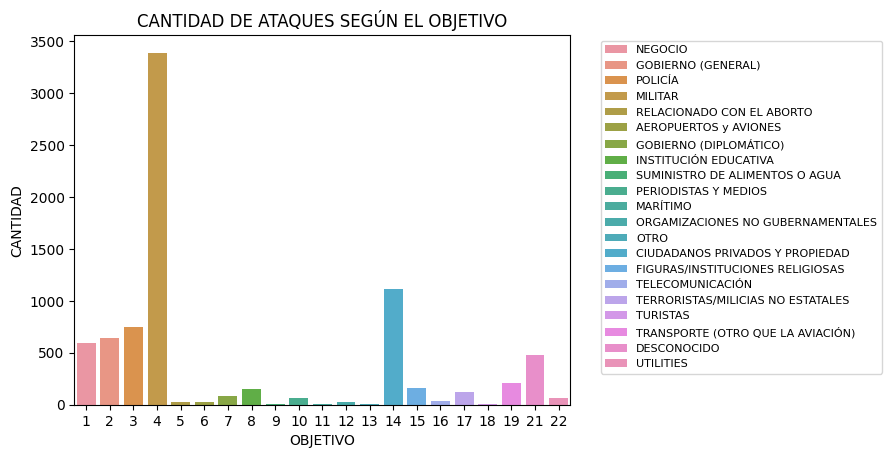

In [ ]:
# Numero de ataques por tipo de victima
filtro_victima = df_filtrado_1[['targtype1']]
sns.countplot(data = filtro_victima, x = 'targtype1', hue = 'targtype1', dodge = False)
plt.title("CANTIDAD DE ATAQUES SEGÚN EL OBJETIVO")
plt.xlabel("OBJETIVO")
plt.ylabel("CANTIDAD")
plt.legend(["NEGOCIO","GOBIERNO (GENERAL)","POLICÍA","MILITAR","RELACIONADO CON EL ABORTO","AEROPUERTOS y AVIONES",
            "GOBIERNO (DIPLOMÁTICO)","INSTITUCIÓN EDUCATIVA","SUMINISTRO DE ALIMENTOS O AGUA","PERIODISTAS Y MEDIOS",
            "MARÍTIMO","ORGAMIZACIONES NO GUBERNAMENTALES","OTRO","CIUDADANOS PRIVADOS Y PROPIEDAD","FIGURAS/INSTITUCIONES RELIGIOSAS",
            "TELECOMUNICACIÓN","TERRORISTAS/MILICIAS NO ESTATALES","TURISTAS","TRANSPORTE (OTRO QUE LA AVIACIÓN)",
            "DESCONOCIDO","UTILITIES","PARTIDOS POLÍTICOS VIOLENTOS"], fontsize=8,
           bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# datos del dataset
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#@title Funciones de Tuning de Parámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def TuningDecisionTreeCriterions(X_train, X_test, y_train, y_test, ylim_min, ylim_max):
  criterions = ["gini", "entropy", "log_loss"]
  accuracys = []

  for criterion in criterions:
    est = DecisionTreeClassifier(criterion = criterion,  random_state=10)
    est.fit(X_train, y_train)
    accuracy = accuracy_score(est.predict(X_test), y_test)
    accuracys.append(accuracy)
    print("criterion = ", criterion, ", accuracy = ", accuracy)

  plt.bar(criterions, accuracys, label="accuracy", color="blue")
  plt.ylim(ylim_min, ylim_max)
  plt.xlabel("criterion")
  plt.ylabel("performance")
  plt.legend()

def TuningDecisionTreeMaxDepth(criterion, max_depths, X_train, X_test, y_train, y_test):
  accuracys = []

  for depth in max_depths:
    est = DecisionTreeClassifier(criterion = criterion, max_depth = depth,  random_state=10)
    est.fit(X_train,y_train)
    accuracy = accuracy_score(est.predict(X_test), y_test)
    accuracys.append(accuracy)
    print("max_depth = ", depth, ", accuracy = ", accuracy)

  plt.plot(max_depths, accuracys, label="accuracy", color="blue")
  plt.xlabel("max_depth")
  plt.ylabel("performance")
  plt.legend()

def TuningRandomForestNEstimators(n_estimators, X_train, X_test, y_train, y_test):
  accuracys = []

  for estimator in n_estimators:
    est = RandomForestClassifier(n_estimators=estimator,  random_state=10)
    est.fit(X_train,y_train)
    accuracy = accuracy_score(est.predict(X_test), y_test)
    accuracys.append(accuracy)
    print("n_estimator = ", estimator, ", accuracy = ", accuracy)

  plt.plot(n_estimators, accuracys, label="accuracy", color="blue")
  plt.xlabel("n estimators")
  plt.ylabel("performance")
  plt.legend()

def TuningRandomForestCriterion(n_estimators, X_train, X_test, y_train, y_test, ylim_min, ylim_max):
  criterions = ["gini", "entropy", "log_loss"]
  accuracys = []

  for criterion in criterions:
    est = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion,  random_state=10)
    est.fit(X_train,y_train)
    accuracy = accuracy_score(est.predict(X_test), y_test)
    accuracys.append(accuracy)
    print("criterion = ", criterion, ", accuracy = ", accuracy)

  plt.bar(criterions, accuracys, label="accuracy", color="blue")
  plt.ylim(ylim_min, ylim_max)
  plt.xlabel("criterion")
  plt.ylabel("performance")
  plt.legend()

def TuningRandomForestMaxDepths(max_depths, n_estimators, criterion, X_train, X_test, y_train, y_test):
  accuracys = []

  for depth in max_depths:
    est = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, max_depth = depth,  random_state=10)
    est.fit(X_train,y_train)
    accuracy = accuracy_score(est.predict(X_test), y_test)
    accuracys.append(accuracy)
    print("depth = ", depth, ", accuracy = ", accuracy)

  plt.plot(max_depths, accuracys, label="accuracy", color="blue")
  plt.xlabel("depth")
  plt.ylabel("performance")
  plt.legend()

def TuningSVC(X_train, X_test, y_train, y_test, ylim_min, ylim_max):
  kernels = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
  accuracys = []

  for kernel in kernels:
    est = SVC(kernel = kernel, random_state = 10)
    est.fit(X_train,y_train)
    accuracy = accuracy_score(est.predict(X_test), y_test)
    accuracys.append(accuracy)
    print("kernel = ", kernel, ", accuracy = ", accuracy)

  plt.bar(kernels, accuracys, label="accuracy", color="blue")
  plt.ylim(ylim_min, ylim_max)
  plt.xlabel("kernel")
  plt.ylabel("performance")
  plt.legend()

# Partición del dataset (20% test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Particion del dataset
X = df_filtrado_1.values[:,:-1]
Y = df_filtrado_1.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Selección del Estimador

In [ ]:
#@title Gaussian Bayes
from sklearn.naive_bayes import GaussianNB

est = GaussianNB()
est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))
print(classification_report(y_test, y_pred))

0.489
              precision    recall  f1-score   support

         0.0       0.57      0.00      0.01       815
         1.0       0.49      1.00      0.66       777

    accuracy                           0.49      1592
   macro avg       0.53      0.50      0.33      1592
weighted avg       0.53      0.49      0.32      1592



criterion =  gini , accuracy =  0.9384422110552764
criterion =  entropy , accuracy =  0.9409547738693468
criterion =  log_loss , accuracy =  0.9409547738693468


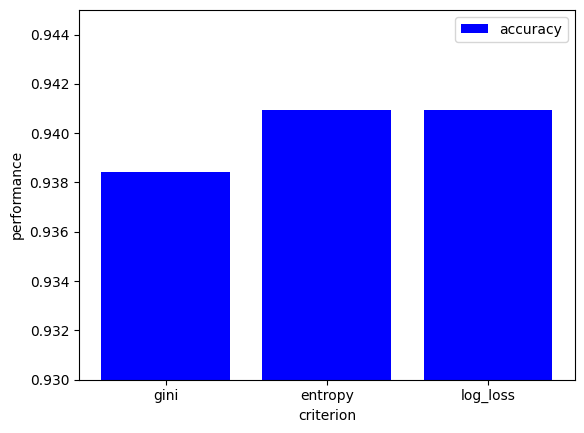

In [ ]:
#@title Decision Tree
ylim_min = 0.93
ylim_max = 0.945
TuningDecisionTreeCriterions(X_train, X_test, y_train, y_test, ylim_min, ylim_max)

max_depth =  1 , accuracy =  0.9152010050251256
max_depth =  2 , accuracy =  0.9447236180904522
max_depth =  3 , accuracy =  0.9597989949748744
max_depth =  4 , accuracy =  0.9597989949748744
max_depth =  5 , accuracy =  0.9597989949748744
max_depth =  6 , accuracy =  0.9623115577889447
max_depth =  7 , accuracy =  0.960427135678392
max_depth =  8 , accuracy =  0.9541457286432161
max_depth =  9 , accuracy =  0.9554020100502513
max_depth =  10 , accuracy =  0.9528894472361809


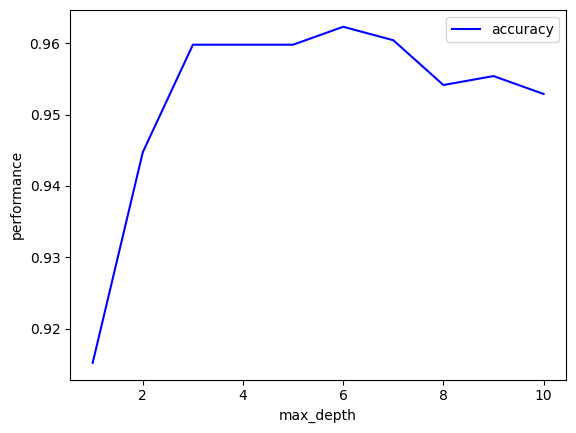

In [ ]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TuningDecisionTreeMaxDepth("entropy", max_depths, X_train, X_test, y_train, y_test)

In [ ]:
est = DecisionTreeClassifier(criterion = "entropy", max_depth=6, random_state=10)
est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print(accuracy_score(est.predict(X_test), y_test))
print(classification_report(y_test, y_pred))

0.9623115577889447
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.96       815
         1.0       0.99      0.93      0.96       777

    accuracy                           0.96      1592
   macro avg       0.96      0.96      0.96      1592
weighted avg       0.96      0.96      0.96      1592



n_estimator =  1 , accuracy =  0.9315326633165829
n_estimator =  31 , accuracy =  0.9641959798994975
n_estimator =  61 , accuracy =  0.964824120603015
n_estimator =  91 , accuracy =  0.964824120603015
n_estimator =  121 , accuracy =  0.964824120603015
n_estimator =  151 , accuracy =  0.9654522613065326
n_estimator =  181 , accuracy =  0.964824120603015
n_estimator =  211 , accuracy =  0.9660804020100503
n_estimator =  241 , accuracy =  0.9673366834170855
n_estimator =  271 , accuracy =  0.9667085427135679
n_estimator =  301 , accuracy =  0.9667085427135679


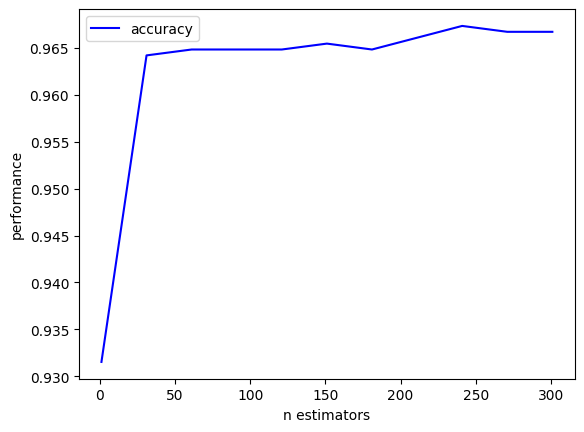

In [ ]:
#@title **Random Forest**
# Utilizando n_estimators
from sklearn.ensemble import RandomForestClassifier

#n_estimators = [10, 50, 100, 150, 200, 250, 300]
#n_estimators = [150, 160, 170, 180, 190, 200]

n_estimators = range(1, 302, 30)
TuningRandomForestNEstimators(n_estimators, X_train, X_test, y_train, y_test)

criterion =  gini , accuracy =  0.9673366834170855
criterion =  entropy , accuracy =  0.9660804020100503
criterion =  log_loss , accuracy =  0.9660804020100503


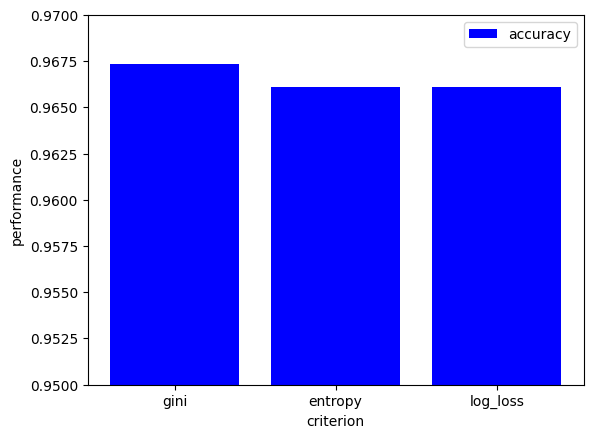

In [ ]:

# Utilizando criterion
from sklearn.ensemble import RandomForestClassifier

ylim_min = 0.95
ylim_max = 0.97
n_estimators = 241

TuningRandomForestCriterion(n_estimators, X_train, X_test, y_train, y_test, ylim_min, ylim_max)

depth =  1 , accuracy =  0.9277638190954773
depth =  5 , accuracy =  0.960427135678392
depth =  10 , accuracy =  0.964824120603015
depth =  20 , accuracy =  0.9685929648241206
depth =  30 , accuracy =  0.9673366834170855
depth =  40 , accuracy =  0.9673366834170855
depth =  50 , accuracy =  0.9673366834170855


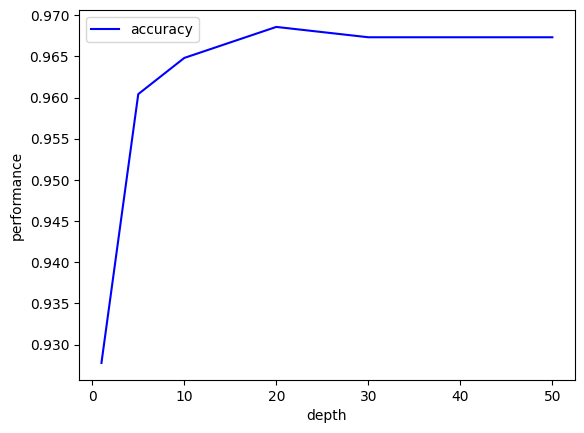

In [ ]:
#@title **Tuning de parametros par Random Forest**
# Utilizando max_depth
from sklearn.ensemble import RandomForestClassifier

max_depths = [1, 5, 10, 20, 30 , 40, 50]
n_estimators = 241
criterion = "gini"

TuningRandomForestMaxDepths(max_depths, n_estimators, criterion, X_train, X_test, y_train, y_test)

In [ ]:
#@title ***Clasificador con el Tuning de Parámetros***
est = RandomForestClassifier(n_estimators = 241, criterion = "gini", max_depth = 20, random_state = 10)
est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print(accuracy_score(est.predict(X_test), y_test))
print(classification_report(y_test, y_pred))

0.9685929648241206
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       815
         1.0       0.99      0.94      0.97       777

    accuracy                           0.97      1592
   macro avg       0.97      0.97      0.97      1592
weighted avg       0.97      0.97      0.97      1592



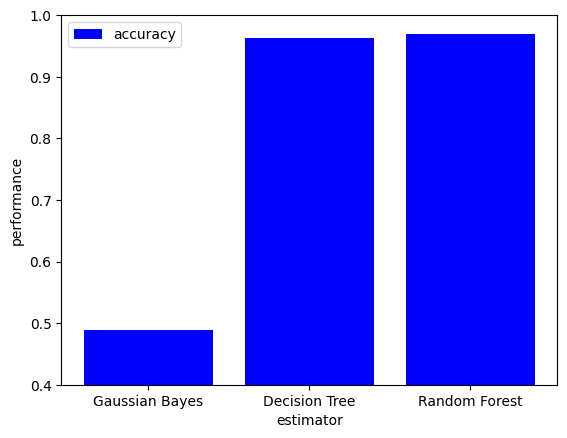

In [ ]:
accuracys = [0.489 ,0.9623115577889447 ,0.9685929648241206]
estimator = ["Gaussian Bayes", "Decision Tree", "Random Forest"]

plt.bar(estimator, accuracys, label="accuracy", color="blue")
plt.ylim(0.4, 1)
plt.xlabel("estimator")
plt.ylabel("performance")
plt.legend()

In [ ]:
#@title **Clasificador según el Grupo**
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# los txt para saber los valores
df_filtrado_txt = df[['country', 'country_txt', 'region', 'region_txt', 'attacktype1','targtype1','targtype1_txt', 'attacktype1_txt', 'targsubtype1','targsubtype1_txt', 'weaptype1',
                      'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'doubtterr']]

# datos numericos flitrados
df_filtrado_b = df[['extended','country', 'vicinity', 'crit1', 'crit2', 'crit3', 'success','suicide', 'attacktype1', 'targtype1', 'gname',
                  'targsubtype1', 'weaptype1', 'weapsubtype1', 'nkill','nwound', 'property','ishostkid', 'propvalue']]

df_filtrado_2 = df_filtrado_b.copy()
# Crear una instancia del codificador
label_encoder = LabelEncoder()

# Eliminar Unknown
df_filtrado_2 = df_filtrado_2[df_filtrado_2['gname'] != "Unknown"]

# agregar ground trud
df_filtrado_2['gname_numerical'] = label_encoder.fit_transform(df_filtrado_2['gname'])

# filtar datos
df_filtrado_2 = df_filtrado_2[df_filtrado_2['gname_numerical'] != -9]
df_filtrado_2 = df_filtrado_2.dropna()

df_filtrado_2 = df_filtrado_2.drop("gname", axis = 1)

print(df_filtrado_2.shape)

(17726, 19)


<ipython-input-20-ebe1d7f3ec05>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_2['gname_numerical'] = label_encoder.fit_transform(df_filtrado_2['gname'])


In [ ]:
# Obtener el recuento de incidencias de cada grupo
incidencias = df_filtrado_2['gname_numerical'].value_counts()

# Obtener los 10 grupos con más incidencias
top_10_grupos = incidencias.nlargest(10)

# Imprimir los resultados
print("Los 10 grupos con más incidencias son:")
print(top_10_grupos)

Los 10 grupos con más incidencias son:
3138    1861
1535    1421
1120     965
177      733
704      713
2948     695
2266     549
1800     405
3165     347
617      345
Name: gname_numerical, dtype: int64


(8034, 19)


<Axes: ylabel='Type'>

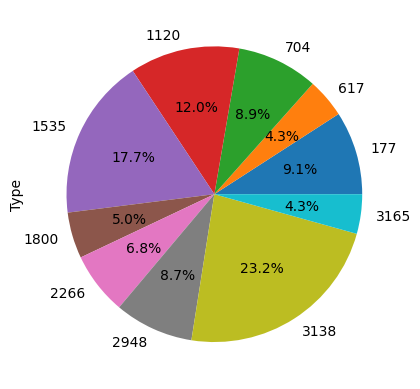

In [ ]:
# Balanceo del dataset
# filtar datos
valores = [3138, 1535, 1120, 177, 704, 2948, 2266, 1800, 3165, 617]
df_filtrado_2 = df_filtrado_2[df_filtrado_2['gname_numerical'].isin(valores)]

print(df_filtrado_2.shape)

df_filtrado_2.groupby('gname_numerical').size().plot(kind='pie',
                                       y = "gname_numerical",
                                       label = "Type",
                                       autopct='%1.1f%%')

177     345
617     345
704     345
1120    345
1535    345
1800    345
2266    345
2948    345
3138    345
3165    345
Name: gname_numerical, dtype: int64
(3450, 19)


<Axes: ylabel='Type'>

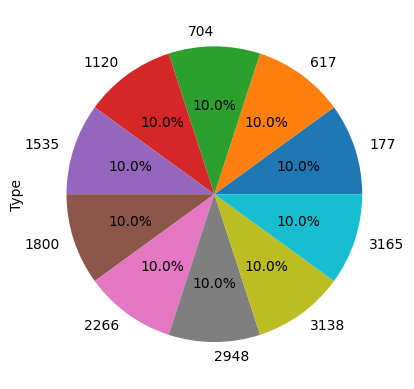

In [ ]:
# Número total de incidencias por grupo
num_incidencias_por_grupo = 345

# Función para realizar el muestreo aleatorio por grupo
def balancear_grupo(df_grupo):
    if len(df_grupo) > num_incidencias_por_grupo:
        return df_grupo.sample(num_incidencias_por_grupo, random_state=10)
    else:
        return df_grupo

# Aplicar el muestreo aleatorio a cada grupo
df_filtrado_balanceado = df_filtrado_2.groupby('gname_numerical').apply(balancear_grupo)

# Restablecer el índice del DataFrame balanceado
df_filtrado_balanceado = df_filtrado_balanceado.reset_index(drop=True)

# Verificar el balanceo de los grupos
conteo_grupos = df_filtrado_balanceado['gname_numerical'].value_counts()
print(conteo_grupos)
print(df_filtrado_balanceado.shape)

df_filtrado_balanceado.groupby('gname_numerical').size().plot(kind='pie',
                                       y = "gname_numerical",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
#@title **Partición del Dataset**
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Particion del dataset
X = df_filtrado_2.values[:,:-1]
Y = df_filtrado_2.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
#@title Gaussian Bayes
from sklearn.naive_bayes import GaussianNB

est = GaussianNB()
est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))
print(classification_report(y_test, y_pred))

0.293
              precision    recall  f1-score   support

       177.0       0.25      0.75      0.38       132
       617.0       1.00      0.01      0.03        77
       704.0       0.00      0.00      0.00       137
      1120.0       0.98      0.62      0.76       203
      1535.0       0.30      0.89      0.45       261
      1800.0       0.00      0.00      0.00        94
      2266.0       0.07      0.09      0.08       107
      2948.0       0.40      0.01      0.03       138
      3138.0       0.00      0.00      0.00       385
      3165.0       0.00      0.00      0.00        73

    accuracy                           0.29      1607
   macro avg       0.30      0.24      0.17      1607
weighted avg       0.28      0.29      0.21      1607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


criterion =  gini , accuracy =  0.9919103920348475
criterion =  entropy , accuracy =  0.9919103920348475
criterion =  log_loss , accuracy =  0.9919103920348475


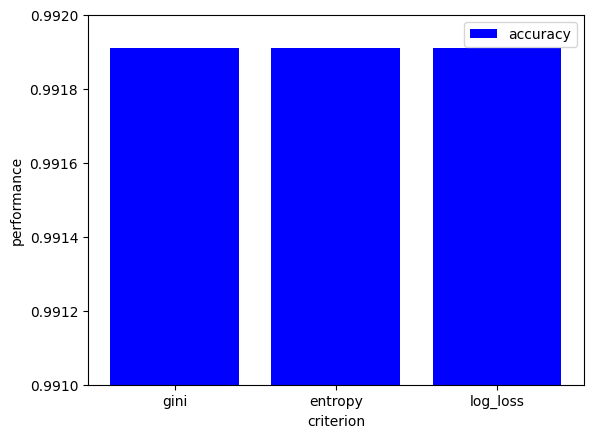

In [ ]:
#@title Decision Tree
ylim_min = 0.991
ylim_max = 0.992
TuningDecisionTreeCriterions(X_train, X_test, y_train, y_test, ylim_min, ylim_max)

max_depth =  1 , accuracy =  0.4013690105787181
max_depth =  2 , accuracy =  0.5942750466708152
max_depth =  3 , accuracy =  0.7417548226509023
max_depth =  4 , accuracy =  0.9278158058494088
max_depth =  5 , accuracy =  0.9775980087118855
max_depth =  6 , accuracy =  0.9900435594275047
max_depth =  7 , accuracy =  0.9912881144990666
max_depth =  8 , accuracy =  0.9943995021779714
max_depth =  9 , accuracy =  0.9956440572495333
max_depth =  10 , accuracy =  0.9919103920348475


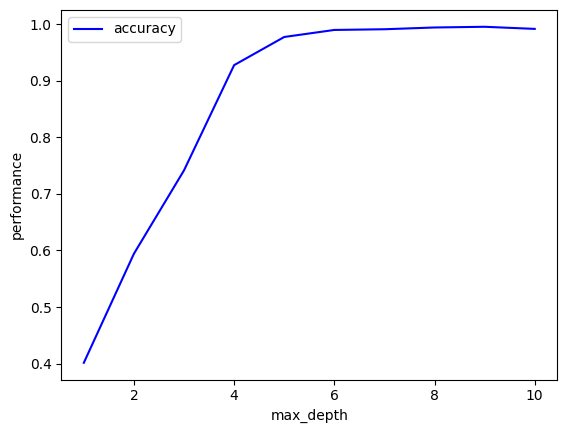

In [ ]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TuningDecisionTreeMaxDepth("entropy", max_depths, X_train, X_test, y_train, y_test)

In [ ]:
#@title ***Clasificador con el Tuning de Parámetros***
est = DecisionTreeClassifier(criterion = "entropy", max_depth = 9, random_state = 10)
est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print(accuracy_score(est.predict(X_test), y_test))
print(classification_report(y_test, y_pred))

0.9956440572495333
              precision    recall  f1-score   support

       177.0       1.00      0.98      0.99       132
       617.0       1.00      1.00      1.00        77
       704.0       1.00      1.00      1.00       137
      1120.0       0.99      1.00      1.00       203
      1535.0       1.00      0.99      0.99       261
      1800.0       0.97      1.00      0.98        94
      2266.0       1.00      0.99      1.00       107
      2948.0       1.00      1.00      1.00       138
      3138.0       1.00      1.00      1.00       385
      3165.0       0.99      1.00      0.99        73

    accuracy                           1.00      1607
   macro avg       0.99      1.00      1.00      1607
weighted avg       1.00      1.00      1.00      1607



n_estimator =  1 , accuracy =  0.8730553827006845
n_estimator =  11 , accuracy =  0.9464841319228375
n_estimator =  21 , accuracy =  0.9527069072806472
n_estimator =  31 , accuracy =  0.9645301804604853
n_estimator =  41 , accuracy =  0.9614187927815806
n_estimator =  51 , accuracy =  0.9614187927815806
n_estimator =  61 , accuracy =  0.9639079029247044
n_estimator =  71 , accuracy =  0.9645301804604853
n_estimator =  81 , accuracy =  0.9607965152457997
n_estimator =  91 , accuracy =  0.9639079029247044


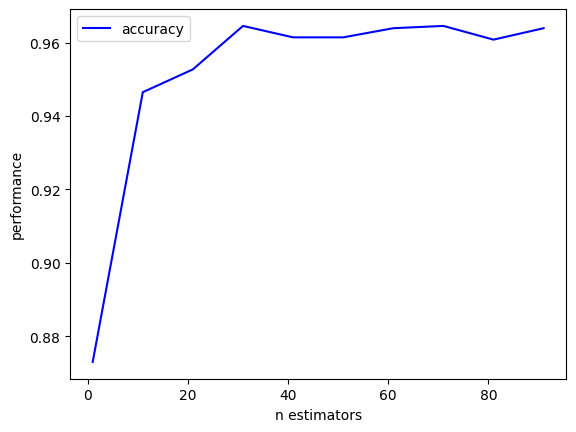

In [ ]:
#@title **Random Forest**
# Utilizando n_estimators
from sklearn.ensemble import RandomForestClassifier

#n_estimators = [10, 50, 100, 150, 200, 250, 300]
#n_estimators = [150, 160, 170, 180, 190, 200]

n_estimators = range(1, 101, 10)
TuningRandomForestNEstimators(n_estimators, X_train, X_test, y_train, y_test)

criterion =  gini , accuracy =  0.9645301804604853
criterion =  entropy , accuracy =  0.9794648413192284
criterion =  log_loss , accuracy =  0.9794648413192284


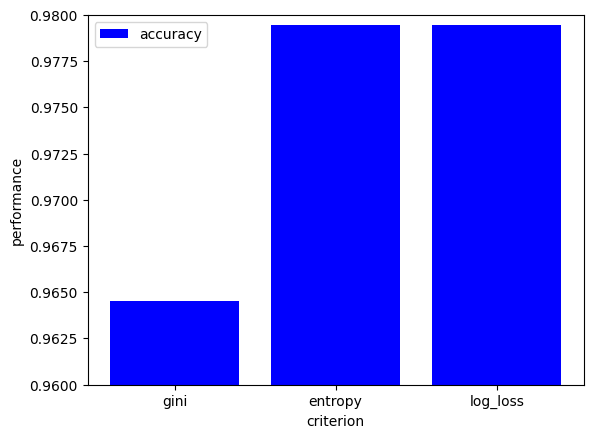

In [ ]:
ylim_min = 0.96
ylim_max = 0.98
n_estimators = 31

TuningRandomForestCriterion(n_estimators, X_train, X_test, y_train, y_test, ylim_min, ylim_max)

depth =  1 , accuracy =  0.48537647790914745
depth =  5 , accuracy =  0.790292470441817
depth =  10 , accuracy =  0.9744866210329807
depth =  15 , accuracy =  0.9769757311761046
depth =  20 , accuracy =  0.9807093963907902
depth =  30 , accuracy =  0.9794648413192284
depth =  40 , accuracy =  0.9794648413192284
depth =  50 , accuracy =  0.9794648413192284


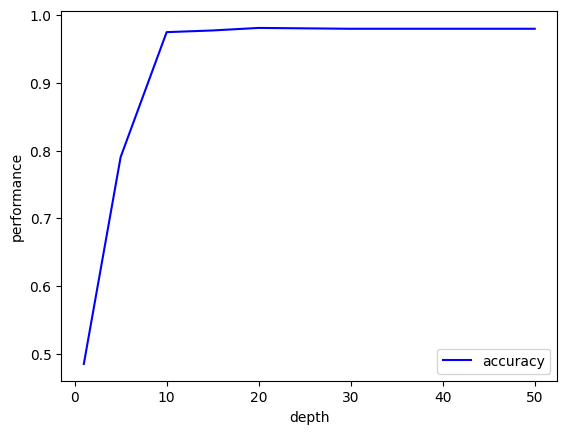

In [ ]:
max_depths = [1, 5, 10, 15, 20, 30 , 40, 50]
n_estimators = 31
criterion = "entropy"

TuningRandomForestMaxDepths(max_depths, n_estimators, criterion, X_train, X_test, y_train, y_test)

In [ ]:
#@title ***Clasificador con el Tuning de Parámetros***
est = RandomForestClassifier(n_estimators = 31, criterion = "entropy", max_depth = 20, random_state = 10)
est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print(accuracy_score(est.predict(X_test), y_test))
print(classification_report(y_test, y_pred))

0.9807093963907902
              precision    recall  f1-score   support

       177.0       0.98      0.97      0.97       132
       617.0       0.95      0.92      0.93        77
       704.0       0.97      1.00      0.99       137
      1120.0       0.99      1.00      1.00       203
      1535.0       0.97      0.98      0.98       261
      1800.0       0.96      0.85      0.90        94
      2266.0       0.96      1.00      0.98       107
      2948.0       1.00      0.99      1.00       138
      3138.0       1.00      1.00      1.00       385
      3165.0       0.97      0.99      0.98        73

    accuracy                           0.98      1607
   macro avg       0.97      0.97      0.97      1607
weighted avg       0.98      0.98      0.98      1607



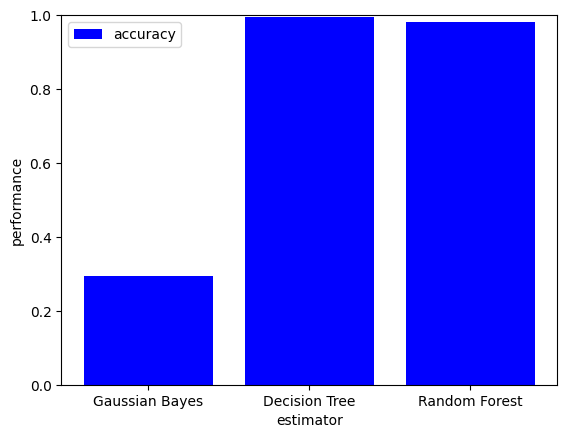

In [ ]:
accuracys = [0.293, 0.9956440572495333, 0.9807093963907902]
estimator = ["Gaussian Bayes", "Decision Tree", "Random Forest"]

plt.bar(estimator, accuracys, label="accuracy", color="blue")
plt.ylim(0, 1)
plt.xlabel("estimator")
plt.ylabel("performance")
plt.legend()